# About

Bellabeat is a high-tech manufacturer of health-focused products for women. 
The goal of Bellabeat is to break into a larger market using data to find out how consumers use wearable tech (such as a leaf and a watch) to track health and habits statistics. 
Bellabeat uses several different avenues to market their technology, including their own e-commerce channel and both print and digital media.


# Questions for Analysis

Questions for Analysis: 

1. What are some trends in smart device usage? .
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy?

# Business Task

Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices.

# Data Sources


    
Fitbit Refined Data and Fitbit Fitness Bellabeat High Tech Company (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits. 

NOTE: This data has some limitations, as not all users tracked every piece coming up in the analysis.

# Preparing Data

Datasets Used:
    
    daily_merged.csv
    sleepDay_merged.csv
    
When I started this, I was pointed to the FitBit Fitness Tracker Data source, but have since found the same source data, but has been refined for quicker study.

NOTE: The daily-merged data has the same information as the sleepDay_merged data, but specifically has sleep information separated from the active and sedentary movement data.

I am using R studio to conduct the uploading, cleaning, and visualization of data.

In [1]:
# Libraries downloaded

library(tidyverse)
library(dplyr)

    


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Processing Data

In [2]:
# Importing datasets

daily <- read.csv("/kaggle/input/fitbit-refined-data/Daily_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit-fitness-bellabeat-high-tech-company/sleepDay_merged.csv")




In [3]:
# Distinct users in study

n_distinct(daily$Id)
n_distinct(sleep$Id)



[1] 33

[1] 24

In [4]:
# Tibbles on basic data structure

head(daily)
head(sleep)

,Id,time,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,HRV
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,NA
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,NA
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,NA
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,NA
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,NA


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


# Cleaning Data

Removing duplicates and blank spaces

In [5]:
# Removing duplicate row information

distinct(daily)
distinct(sleep)

Id,time,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,HRV
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,NA
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,NA
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA,NA
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,NA
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,NA
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,NA
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921,NA,NA,NA,NA
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,NA
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786,1,360,377,NA


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


In [6]:
# Removing unnecessary spaces

drop_na(daily)
drop_na(sleep)

Id,time,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,HRV
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
4388161847,2016-04-15,8758,6.73,6.73,0,0.00,0.00,6.73,0,0,0,299,837,3066,1,499,526,16.99843
4388161847,2016-04-16,6580,5.06,5.06,0,0.21,0.40,4.45,0,6,9,253,609,3073,2,426,448,10.10892
4388161847,2016-04-17,4660,3.58,3.58,0,0.00,0.00,3.58,0,0,0,201,721,2572,2,619,641,11.08262
4388161847,2016-04-18,11009,9.10,9.10,0,3.56,0.40,5.14,0,27,8,239,1017,3274,1,99,104,18.16564
4388161847,2016-04-19,10181,7.83,7.83,0,1.37,0.69,5.77,0,20,16,249,704,3015,1,329,338,16.42570
4388161847,2016-04-20,10553,8.12,8.12,0,1.10,1.72,5.29,0,19,42,228,696,3083,1,421,451,15.08491
4388161847,2016-04-21,10055,7.73,7.73,0,0.37,0.39,6.98,0,7,12,272,853,3069,1,442,458,17.33570
4388161847,2016-04-22,12139,9.34,9.34,0,3.30,1.11,4.92,0,77,25,220,945,3544,1,82,85,13.77425
4388161847,2016-04-23,13236,10.18,10.18,0,4.50,0.32,5.35,0,58,5,215,749,3306,1,478,501,17.45425


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


# Analyzing

In [7]:
# summary of daily source

summary(daily)



       Id                time             TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
                                                                        
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           M

Upon reviewing the data, some of the following observations were made. There is a large difference in between the minumum and maximum variable in Very Active Distance, suggesting that maybe a small number of users are hitting that peak, while a large majority of users do not have Very Active Distance metrics, simply because most never hit that metric on their tech. Moderately Active Distance and somewhat of Light Active Distance shows something similar suggesting once again that only a few (maybe even one?) user is hitting the peak in the Moderately Active range (or to a lesser degree the Lightly Active Distance) of their wearable tech.

The mean (average) of Very Active Minutes vs. Sedentary Minutes and even Lightly Active Minutes is quite dramatic, and may be a good variable to point out in the Presentation stage.

In [8]:
# summary of sleep source

summary(sleep)

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

# Visualization

Based on observations made with the daily data, we are going to see if there is a correlation between the different levels of movement during a typical day.


In [9]:
# load ggplot library

library(ggplot2)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


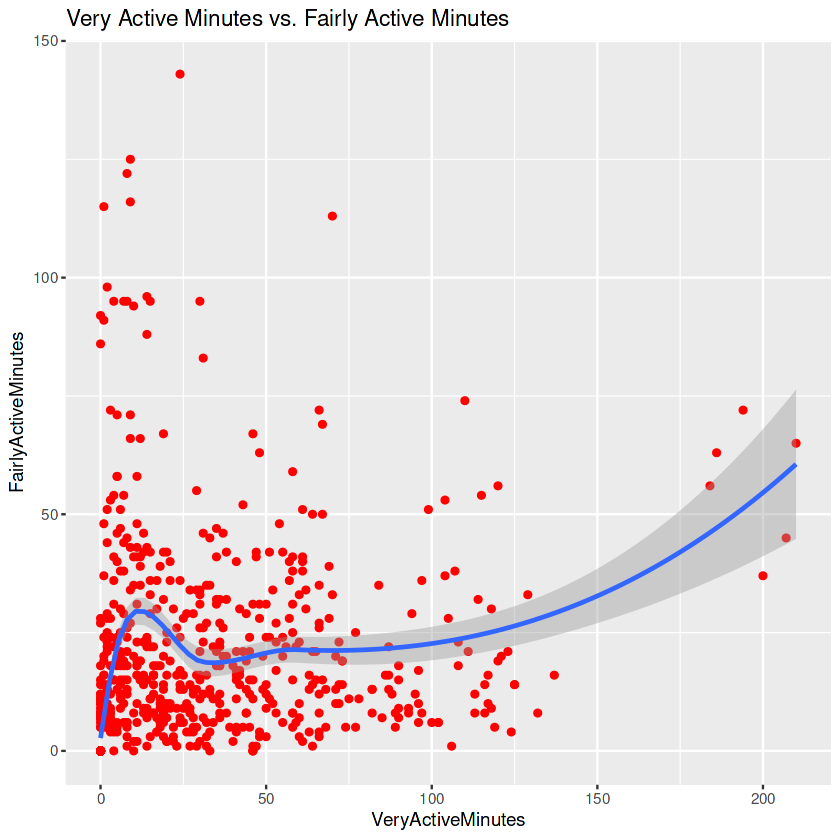

In [10]:
# Compare Very Active Minutes with Fairly Active Minutes

ggplot(data=daily, mapping=aes(x=VeryActiveMinutes, y=FairlyActiveMinutes)) + 
    geom_point(color="red") + 
    geom_smooth() + 
    labs (title="Very Active Minutes vs. Fairly Active Minutes")


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


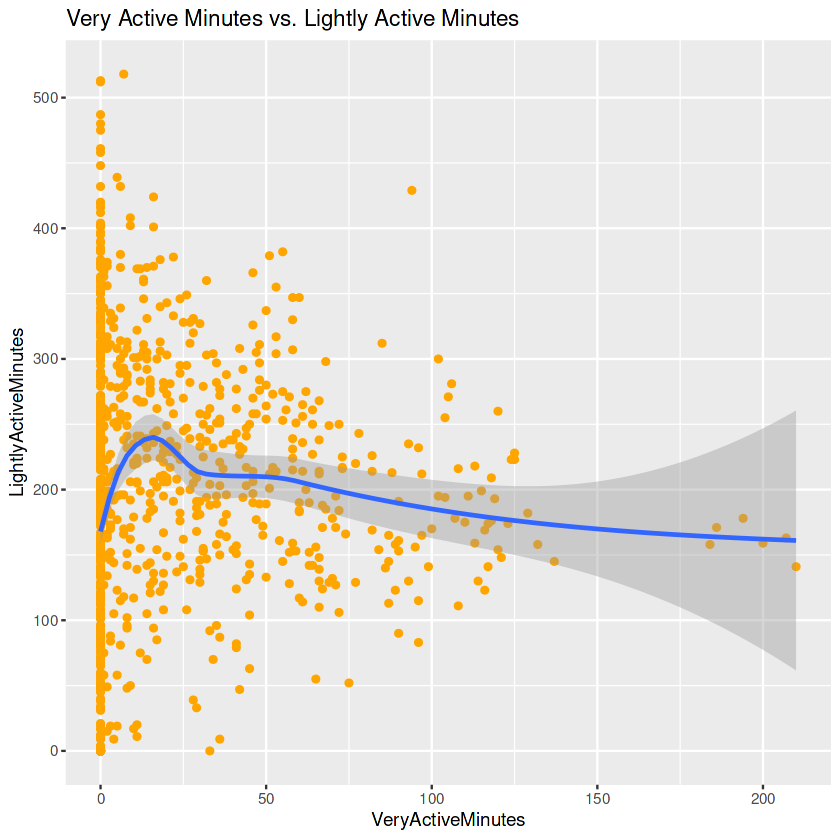

In [11]:
# Compare Very Active Minutes with Lightly Active Minutes

ggplot(data=daily, mapping=aes(x=VeryActiveMinutes, y=LightlyActiveMinutes)) + 
    geom_point(color="orange") + 
    geom_smooth() + 
    labs (title="Very Active Minutes vs. Lightly Active Minutes")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


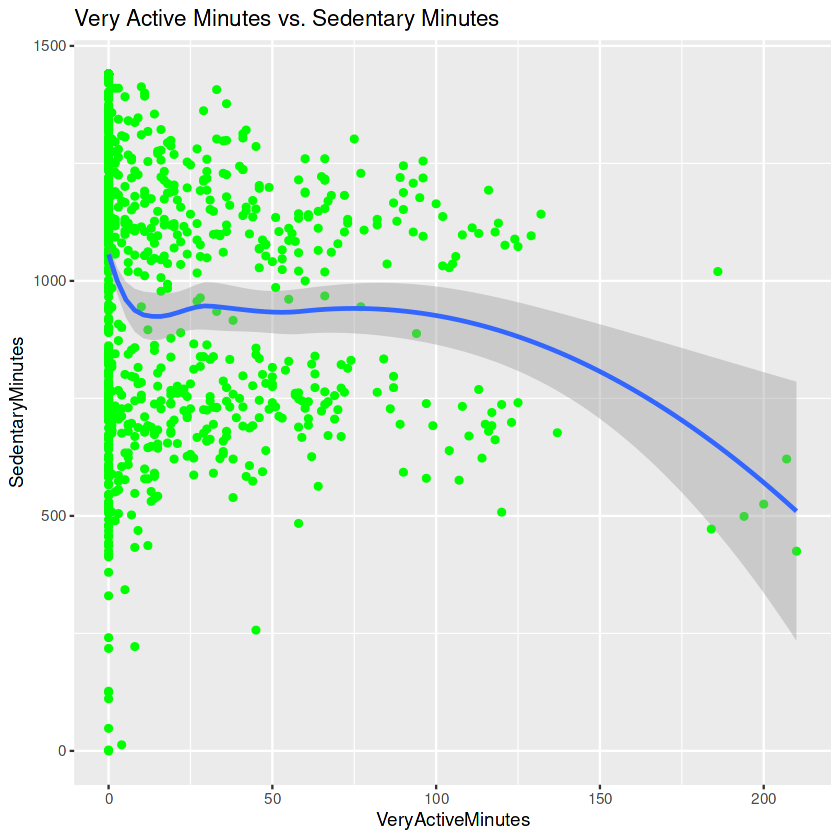

In [12]:
# Compare Very Active Minutes with Sedentary Minutes

ggplot(data=daily, mapping=aes(x=VeryActiveMinutes, y=SedentaryMinutes)) + 
    geom_point(color="green") + 
    geom_smooth() + 
    labs (title="Very Active Minutes vs. Sedentary Minutes")

Based on the visualizations, both Lightly Active Minutes and Sedentary Minutes coorelate negatively with Very Active Minutes. The more Light or Fairly Light, the less Active Minutes, and vice versa. Very Active Minutes vs. Fairly Active is not so obvious, so it seems that those that have Fairly Active Minutes also have Very Active Minutes.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


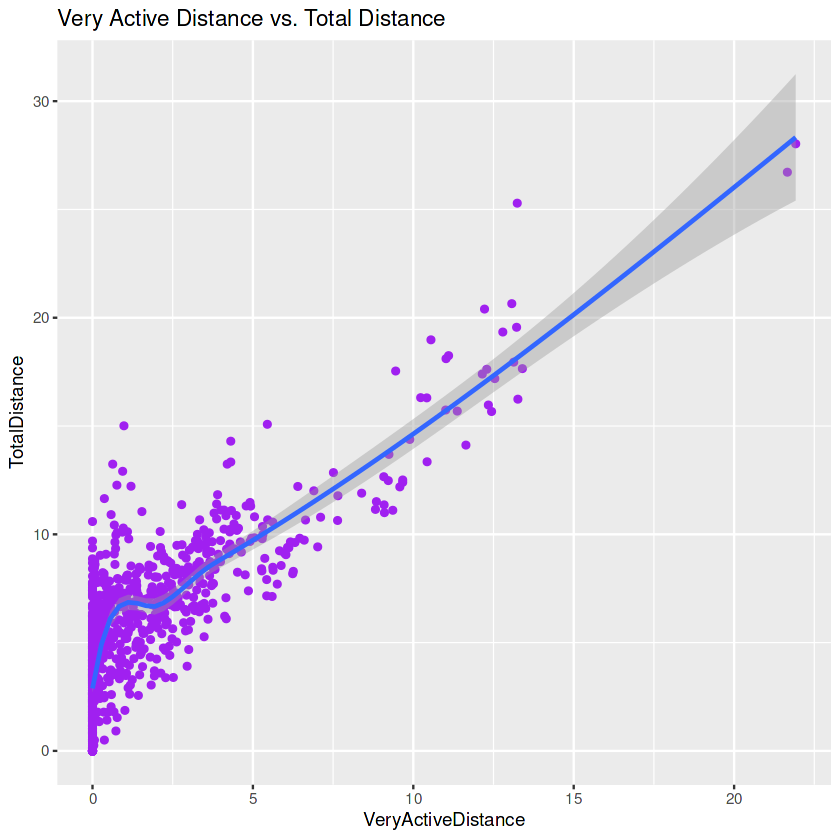

In [13]:
# Compare Total Distance with Very Active Distance

ggplot(data=daily, mapping=aes(x=VeryActiveDistance, y=TotalDistance)) + 
    geom_point(color="purple") + 
    geom_smooth() + 
    labs (title="Very Active Distance vs. Total Distance")

This shows that Total Distance isn't being done at Very Active Levels with this data. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


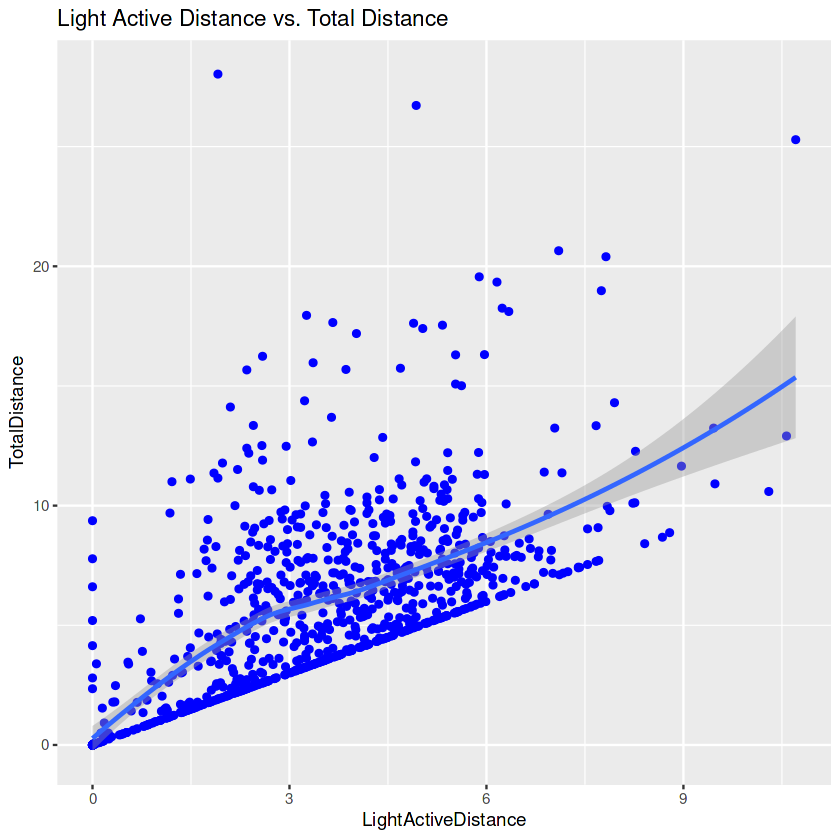

In [14]:
# Compare Total Distance with Fairly Active Distance

ggplot(data=daily, mapping=aes(x=LightActiveDistance, y=TotalDistance)) + 
    geom_point(color="blue") + 
    geom_smooth() + 
    labs (title="Light Active Distance vs. Total Distance")

This is definitely more evened out in terms of Total distance moving forward with Lightly Active Movement of distance. While there are several outliers, it seems that users get their distance in the day with lighter movement. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


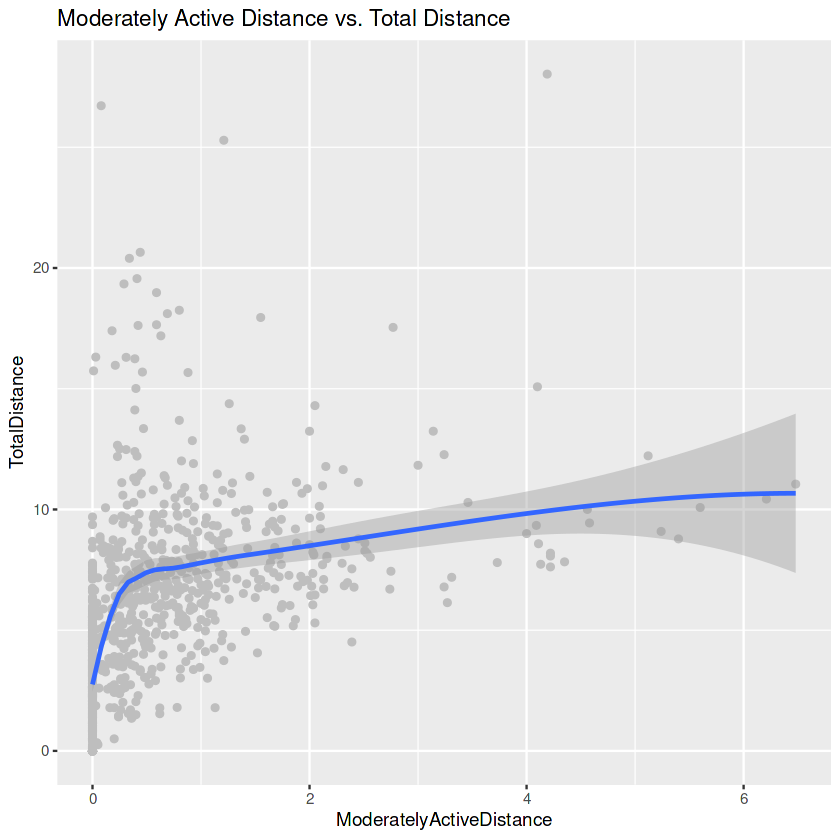

In [15]:
# Compare Total Distance with Moderately Active Distance

ggplot(data=daily, mapping=aes(x=ModeratelyActiveDistance, y=TotalDistance)) + 
    geom_point(color="grey") + 
    geom_smooth() + 
    labs (title="Moderately Active Distance vs. Total Distance")

This is closer with the Very Active Minutes as opposed to the Lightly Active Minutes

Trends in Sleep

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


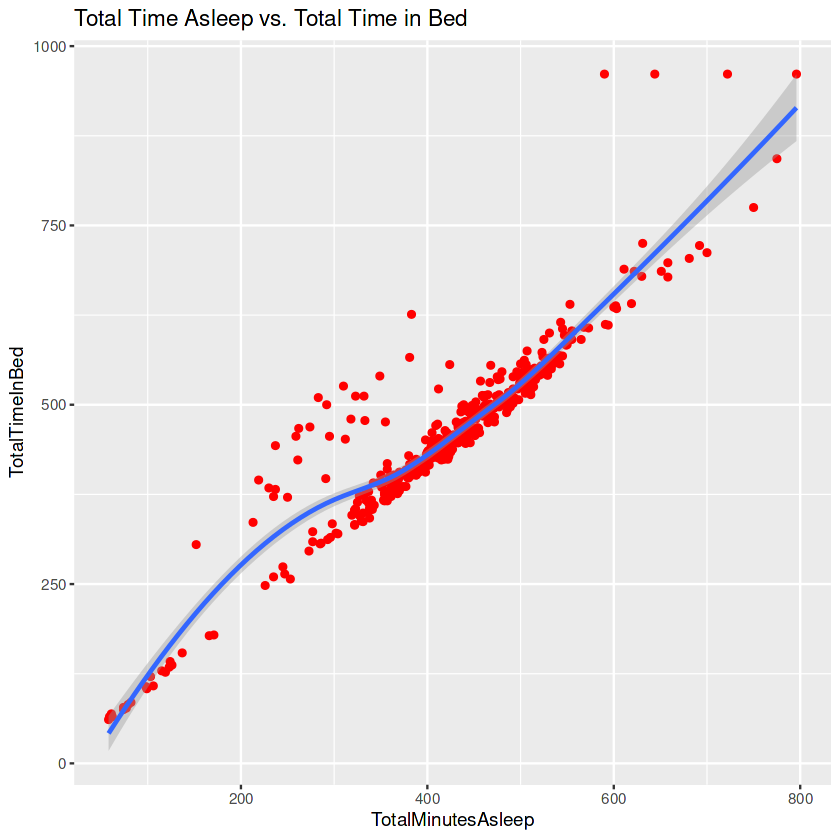

In [16]:
# Compare Time in Bed with Time Asleep

ggplot(data=sleep, mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
    geom_point(color="red") + 
    geom_smooth() + 
    labs (title="Total Time Asleep vs. Total Time in Bed")

This definitely shows that these are very closely correlated. There are some points that would be considered outliers, so I will go back to my earlier observation of this data that is available to us shows an average of almost 420 minutes of sleep, and an average of almost 460 minutes in bed. Is the tech detecting awake based on heartrate? Restlessness? Active minutes awake in bed? Is 40 minutes typical to fall asleep or stay in bed after waking up in the morning? Why don't more users wear their tech to track sleep?

The final graph will now compare the sleep and the daily activity.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 530 rows containing missing values (`geom_point()`).”


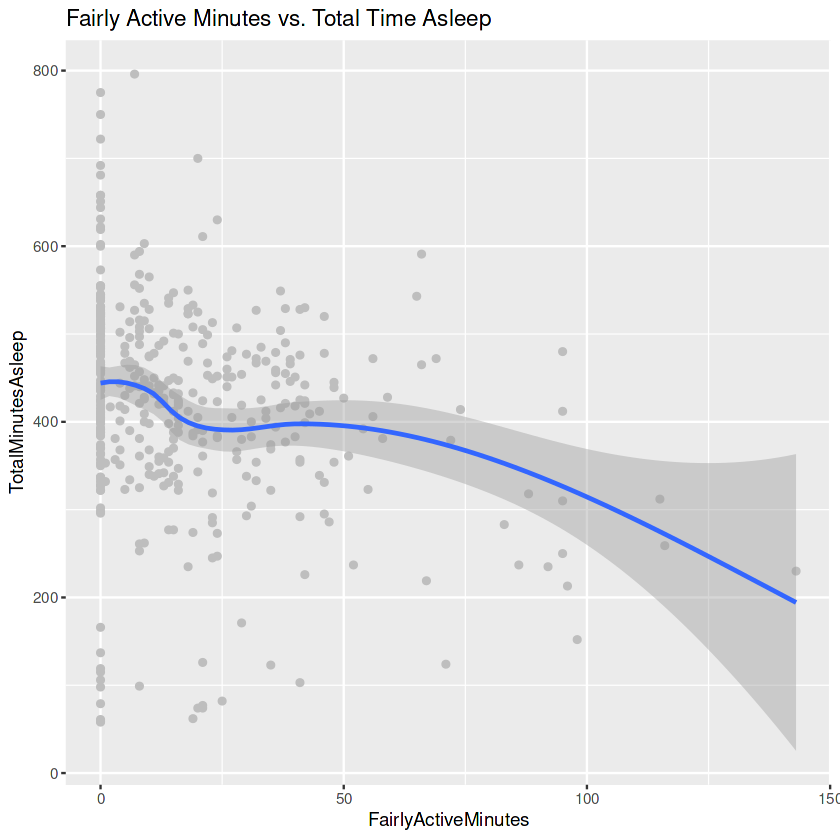

In [17]:
# Compare Total Time Asleep with Fairly Active Minutes

ggplot(data=daily, mapping=aes(x=FairlyActiveMinutes, y=TotalMinutesAsleep)) + 
    geom_point(color="grey") + 
    geom_smooth() + 
    labs (title="Fairly Active Minutes vs. Total Time Asleep")

More time asleep seems to correlate with fewer Fairly Active Minutes. There is also a lot of data that got thrown out due to users that did not track both sleep and active minutes.

# Recommendations based on analysis

We can now answer some questions stated at the beginning of this analysis:


1. What are some trends in smart device usage? 

Upon reviewing the data, some of the following observations were made. There is a large difference between the Minimum number and Maximum number of miles of Very Active Distance, suggesting that maybe a small number of users are hitting that peak, while a large majority of users do not have Very Active Distance metrics, simply because most never hit that metric on their tech. Moderately Active Distance and somewhat of Light Active Distance shows something similar suggesting once again that only a few (maybe even one?) user is in the Moderately Active range (or to a lesser degree the Lightly Active Distance) of their wearable tech.

Very Active Distance
Avg: ~1.5 Miles

Moderately Active Distance
Avg: ~.57 Miles

Light Active Distance
Avg: ~3.34 Miles

Sedentary Active Distance
Avg: ~.001 Miles

Very Active Minutes
Avg: ~21 
 
Fairly Active Minutes
Avg: ~14
 
Lightly Active Minutes
Avg: ~193
 
Sedentary Minutes
Avg: ~991
 
The second observation was with sleep. There was not as much sleep data which may be a significant piece. Why don't more users wear their tech to track sleep? This data that is available to us shows an average of almost 420 minutes of sleep, and an average of almost 460 minutes in bed. Is the tech detecting awake based on heartrate? Restlessness? Active vs. sedentary minutes? Is 40 minutes typical to fall asleep or stay in bed after waking up in the morning? 

In the last graph, it appears that people that are more active are getting more sleep. Getting more sleep will help with energy to have more active minutes.


2. How could these trends apply to Bellabeat customers? 

Because the data used is in a similar market as Bellabeat, it is easy to assume that the trends seen in with the above data will likely be simiar to Bellabeat data.

3. How could these trends help influence Bellabeat marketing strategy?

There are studies that suggest that it is healthy to have movement in every day. The number of active minutes seems much lower than sedentary minutes. The wearable tech should have the ability to alert a user when there is too many sedentary minutes in a day, or better yet, within each hour. The marketing department should also look more in to why fewer users are implementing the sleep part of the tech. A poll should be given to find out what users are looking for in the sleep portion of the tech and implement changes (if possible) based on responses.